In [19]:
pip install split-folders

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import splitfolders
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
!unzip data_no_trash.zip

Archive:  data_no_trash.zip
   creating: no_trash/
  inflating: __MACOSX/._no_trash     
   creating: no_trash/paper/
  inflating: __MACOSX/no_trash/._paper  
  inflating: no_trash/.DS_Store      
  inflating: __MACOSX/no_trash/._.DS_Store  
   creating: no_trash/metal/
  inflating: __MACOSX/no_trash/._metal  
   creating: no_trash/cardboard/
  inflating: __MACOSX/no_trash/._cardboard  
   creating: no_trash/glass/
  inflating: __MACOSX/no_trash/._glass  
   creating: no_trash/plastic/
  inflating: __MACOSX/no_trash/._plastic  
  inflating: no_trash/paper/paper283.jpg  
  inflating: __MACOSX/no_trash/paper/._paper283.jpg  
  inflating: no_trash/paper/paper297.jpg  
  inflating: __MACOSX/no_trash/paper/._paper297.jpg  
  inflating: no_trash/paper/paper526.jpg  
  inflating: __MACOSX/no_trash/paper/._paper526.jpg  
  inflating: no_trash/paper/paper240.jpg  
  inflating: __MACOSX/no_trash/paper/._paper240.jpg  
  inflating: no_trash/paper/paper254.jpg  
  inflating: __MACOSX/no_trash/pape

In [ ]:
splitfolders.ratio("no_trash", output="split_no_trash", seed=42, ratio=(0.8, 0.1, 0.1))

Copying files: 2390 files [00:00, 5205.97 files/s]


In [ ]:
train_path="split_no_trash/train"
val_path="split_no_trash/val"
test_path="split_no_trash/test"

x_train=[]
x_val=[]
x_test=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img        
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x_train.append(img_arr)

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x_val.append(img_arr)
        
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x_test.append(img_arr)

train_x=np.array(x_train)
val_x=np.array(x_val)
test_x=np.array(x_test)

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory(train_path, target_size = (384, 512),
                                                 batch_size = 71, class_mode = "categorical")

val_set = val_datagen.flow_from_directory(val_path, target_size = (384, 512),
                                            batch_size = 20, class_mode = "categorical")

test_set = test_datagen.flow_from_directory(test_path,target_size = (384, 512),
                                            batch_size = 22, class_mode = "categorical")

Found 1910 images belonging to 5 classes.
Found 238 images belonging to 5 classes.
Found 242 images belonging to 5 classes.


In [22]:
train_y=training_set.classes
val_y=val_set.classes
test_y=test_set.classes

training_set.class_indices

train_y.shape, val_y.shape, test_y.shape

((1910,), (238,), (242,))

In [23]:
model = Sequential([
    Conv2D(filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=24, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=40, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=48, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.5),

    Flatten(),

    # Dense(64, activation='relu'),
    # Dropout(0.5),
    
    Dense(6, activation='softmax')
])

model.summary()

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

early_stop=EarlyStopping(monitor="accuracy",
                         mode="auto",
                         verbose=1,
                         patience=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 192, 256, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 192, 256, 16)      1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 96, 128, 16)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 128, 24)       3480      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 64, 24)      

In [24]:
results = model.fit(train_x,
                    train_y,
                    validation_data=(val_x, val_y),
                    epochs=50,
                    callbacks=[early_stop])
                    # shuffle=True)

Epoch 1/50
60/60 [==============================] - 11s 162ms/step - loss: 3.1368 - accuracy: 0.2738 - val_loss: 1.5076 - val_accuracy: 0.3655
Epoch 2/50
60/60 [==============================] - 9s 145ms/step - loss: 1.4481 - accuracy: 0.3796 - val_loss: 1.3841 - val_accuracy: 0.3950
Epoch 3/50
60/60 [==============================] - 9s 145ms/step - loss: 1.3794 - accuracy: 0.4099 - val_loss: 1.5323 - val_accuracy: 0.3529
Epoch 4/50
60/60 [==============================] - 9s 144ms/step - loss: 1.3409 - accuracy: 0.4298 - val_loss: 1.2520 - val_accuracy: 0.5084
Epoch 5/50
60/60 [==============================] - 9s 144ms/step - loss: 1.2484 - accuracy: 0.4780 - val_loss: 1.2361 - val_accuracy: 0.4538
Epoch 6/50
60/60 [==============================] - 9s 144ms/step - loss: 1.1908 - accuracy: 0.5120 - val_loss: 1.2684 - val_accuracy: 0.4496
Epoch 7/50
60/60 [==============================] - 9s 145ms/step - loss: 1.1833 - accuracy: 0.5162 - val_loss: 1.2545 - val_accuracy: 0.4874
Epoch

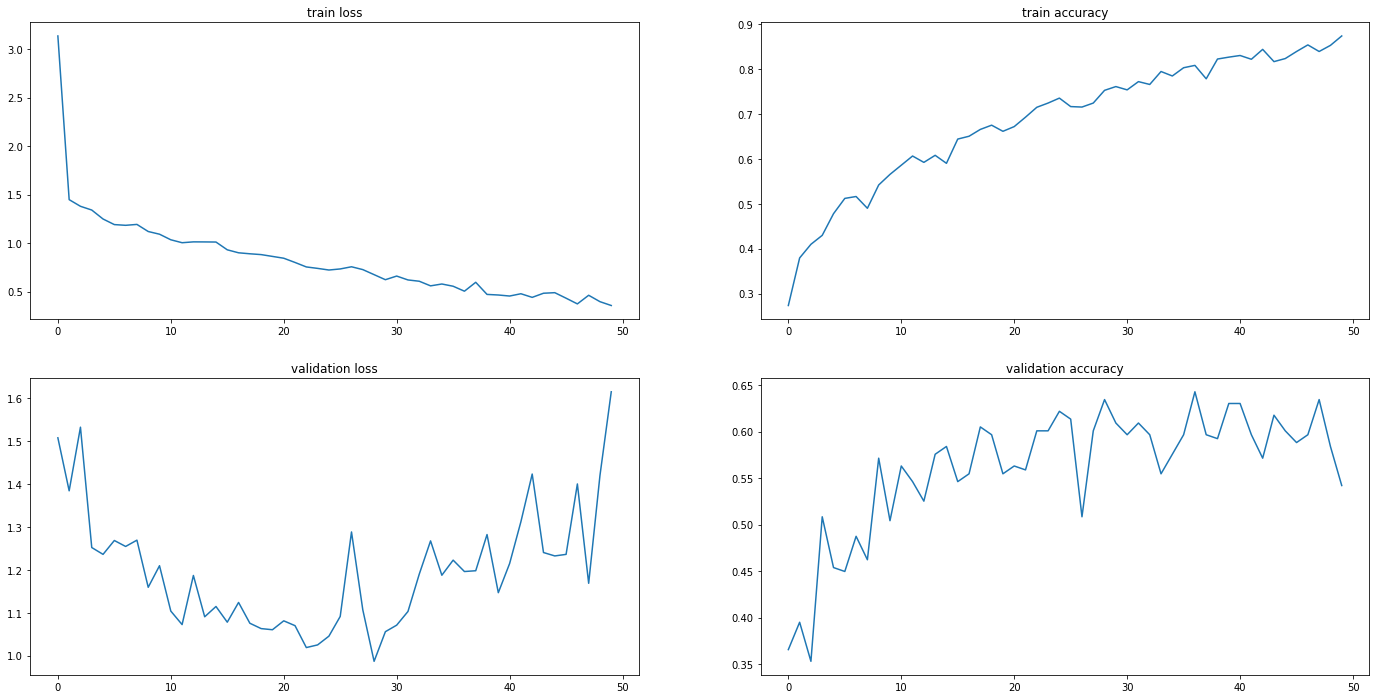

In [25]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(24,12))

ax[0][0].plot(results.history["loss"])
ax[0][1].plot(results.history["accuracy"])
ax[1][0].plot(results.history["val_loss"])
ax[1][1].plot(results.history["val_accuracy"])

ax[0][0].set_title("train loss")
ax[0][1].set_title("train accuracy")
ax[1][0].set_title("validation loss")
ax[1][1].set_title("validation accuracy")
plt.show()

In [26]:
model.evaluate(test_x, test_y, batch_size=43)

6/6 [==============================] - 1s 120ms/step - loss: 1.5362 - accuracy: 0.6157


[1.5362247228622437, 0.6157024502754211]

In [27]:
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

In [28]:
print(confusion_matrix(y_pred, test_y))

[[36  5  4  6  5]
 [ 2 30  9  2  2]
 [ 1  5 17  4  3]
 [ 1  7  8 37 10]
 [ 1  4  3 11 29]]


In [29]:
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        56
           1       0.59      0.67      0.62        45
           2       0.41      0.57      0.48        30
           3       0.62      0.59      0.60        63
           4       0.59      0.60      0.60        48

    accuracy                           0.62       242
   macro avg       0.62      0.61      0.61       242
weighted avg       0.64      0.62      0.62       242

